In [1]:
import tensorflow as tf
tf.__version__

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'1.5.0'

In [6]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [11]:
x_test = tf.keras.utils.normalize(x_test, axis=1)
x_train = tf.keras.utils.normalize(x_train, axis=1)


model = tf.keras.models.Sequential()
# the flatten input layer to convert from matrix to vector
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# two hidden layers each one has 128 neurons
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# the output layer is a softmax for 10 digits what the result of nn is
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================]60000/60000 [==============================] - 6s 96us/step - loss: 0.2652 - acc: 0.9220

Epoch 2/3
60000/60000 [==============================]60000/60000 [==============================] - 5s 91us/step - loss: 0.1090 - acc: 0.9660

Epoch 3/3
60000/60000 [==============================]60000/60000 [==============================] - 6s 92us/step - loss: 0.0745 - acc: 0.9766



In [13]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================]10000/10000 [==============================] - 0s 36us/step

0.09449649711977691 0.9697


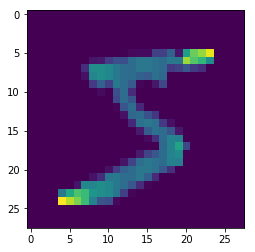

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [6]:
x_train[0].shape


(28, 28)

In [14]:
model.save('num_reader_28_28_flat')

In [15]:
new_model = tf.keras.models.load_model('num_reader_28_28_flat')

In [28]:
# and the way to pedict some samples using a loaded model
# here we predict all the tests and print them as a matrix
predictions = new_model.predict([x_test])
print(predictions)
predictions.shape


[[1.89140053e-07 3.60140433e-08 4.84199045e-05 ... 9.99898672e-01
  1.15250498e-06 1.31752063e-06]
 [2.84276744e-08 3.19651444e-04 9.99665737e-01 ... 4.07759077e-10
  2.12204743e-08 6.31845617e-11]
 [7.23675294e-06 9.99266088e-01 7.01842073e-05 ... 1.18544282e-04
  3.36996047e-04 1.88718186e-05]
 ...
 [3.37647843e-09 1.89862931e-06 5.37257669e-08 ... 2.68697531e-05
  3.94519666e-05 8.47007555e-04]
 [1.98103498e-06 8.37371061e-08 1.14273506e-08 ... 2.74549762e-07
  3.51165101e-04 1.29604905e-09]
 [4.79907430e-06 6.26426981e-07 3.44977366e-06 ... 4.69714045e-10
  1.15366035e-07 1.82370457e-08]]


(10000, 10)

In [32]:
import numpy as np
from matplotlib import pyplot as plt

5


In [45]:
# have a look at the first 20 predictions of the tests
predictions_sf = np.argmax(predictions, axis=1)
predictions_sf[0:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

5


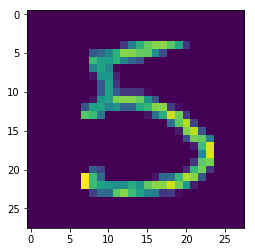

In [46]:
# using argmax to get the biggest index between all the probablities predicted by nn
print(np.argmax(predictions[15]))
# check it out if it is the correct prediction
plt.imshow(x_test[15])
plt.show()